# Fashion Classification

In this session we are going to classify from a dataset what types of clothing accessories are recognised in an image.

- Our training set consists of 70,000 images and we'll divide them into 60,000 training images and 10,000 test images, these images are coverted into gray scale and are available in size of 28x28 pixels
- We have converted one image into gray scale and flatten it's values of 784 pixels (28x28) in a row

There are 10 classes :
0 => T-shirt/Top
1 => Trousers
2 => Pullovers
3 => Dress 
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle Boot

<img src = 'Fashion_Classification_type_of_clothes_files/dataset_images.png' alt='dataset_images'>

## Importing our basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing our Fashion Classification Training and Testing Dataset

In [3]:
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep=',')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

## Converting our Datasets into numpy arrays

In [8]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

## Plotting our dataset tuples into a graph
- First let's import random tuples from our dataset
- We'll be skipping the label in our plot function.
- We will use the imshow function of matplot library
- Also resphaping our array back into it's original form i.e 28x28

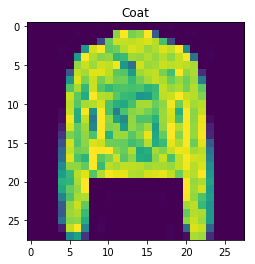

In [26]:
import random
labels = {0 : 'T-shirt/Top',1 : 'Trousers',2 : 'Pullovers',3 : 'Dress' ,4 : 'Coat',5 : 'Sandal',6 : 'Shirt',7 : 'Sneaker',8 : 'Bag'
,9 : 'Ankle Boot'}
number = random.randint(1,60000)
plt.title(f'{labels[training[number,0]]}')
plt.imshow(training[number, 1:].reshape(28,28))

- Let us view our data in a grid format to understand our data set
- We'll create a grid of 15x15 to plot our categories of clothing
- This grid will have images with figure size 0f 17 by 17 
- It will randomly pick 255 tuples from the dataset

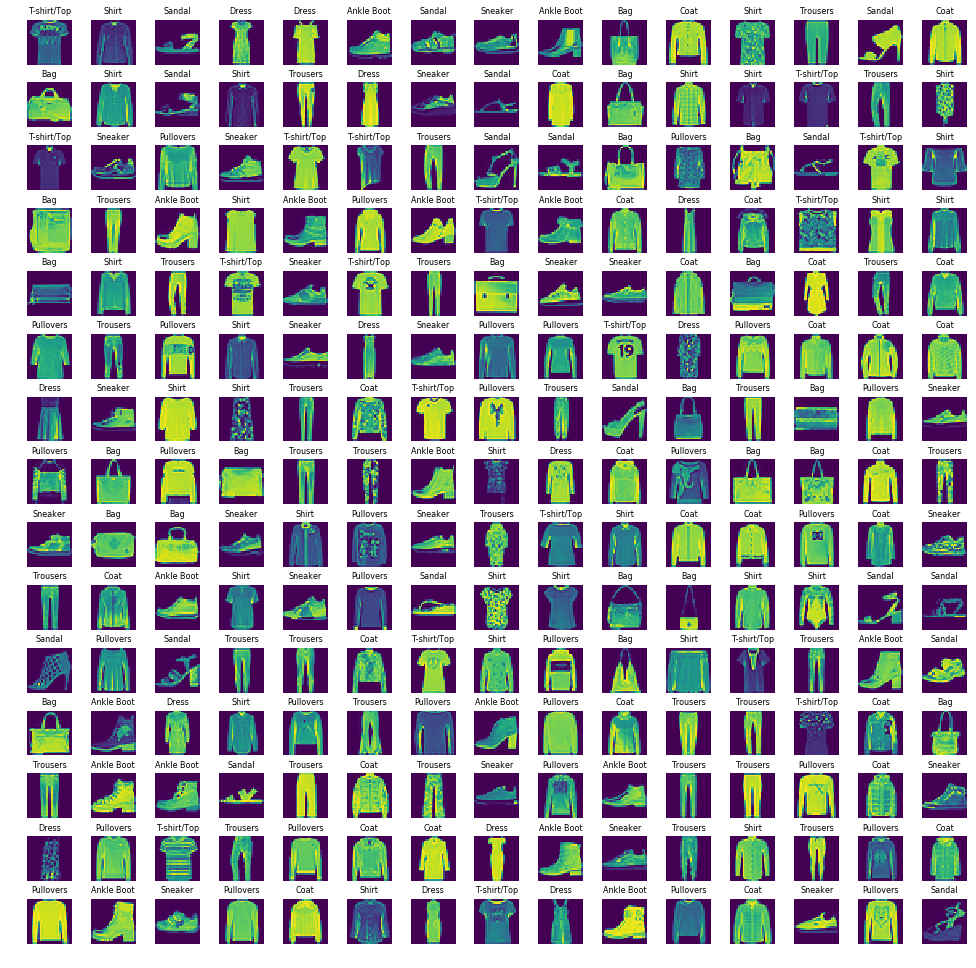

In [33]:
W_grid = 15
L_grid =15

fig,axes = plt.subplots(W_grid, L_grid, figsize = (17,17))

axes = axes.ravel() #Flatten our 15x15 matrix into array of 255

len_training = len(training)
    
for i in np.arange(0, W_grid * L_grid):
    index = random.randint(0, len_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(f'{labels[training[index,0]]}', fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)    

## Our first step is to divide our data into Training and Test sets

In [38]:
X_train = training[:,1:]/255 # We are doing so in order to Normalise our data for better computation
y_train = training[:, 0]

In [39]:
X_test = testing[:,1:]/255 # We are doing so in order to Normalise our data for better computation
y_test = testing[:, 0]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train, test_size = 0.2, random_state= 12345)

- Reshaping our training and test data into the size of 28x28

In [45]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [58]:
X_train[1,:,:].shape

(28, 28, 1)

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#### We'll add a Convolutional layer which will apply 32 feature maps on each and every one of our tuple

In [71]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3, input_shape = (28,28,1), activation = 'relu'))

/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


#### Now adding a Max Pooling layer which will minimise our tuple into a 2x2 image preserving all the important features

In [72]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#### Now our data is ready to be fed into a fully connected ANN but before that we need to flatten our matrix.

In [73]:
cnn_model.add(Flatten())

#### Here we'll feed our points into the ANN with 32 hidden layers and gives us back an output of 11 according to our labels

In [74]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 11, activation = 'sigmoid'))

/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=11)`
  


#### In this step we'll apply the loss function considering that our outputs have multiple categories with an optimizer function and at the end fit our model

In [77]:
cnn_model.compile(loss= 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.01), metrics= ['accuracy'])
epochs = 50
cnn_model.fit(X_train,y_train, batch_size=512, nb_epoch = epochs, verbose=1,validation_data=(X_validate,y_validate))

/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 495us/step - loss: 0.7838 - acc: 0.6267 - val_loss: 0.3728 - val_acc: 0.8633
Epoch 2/50
48000/48000 [==============================] - 24s 508us/step - loss: 0.3283 - acc: 0.8827 - val_loss: 0.2950 - val_acc: 0.8928
Epoch 3/50
48000/48000 [==============================] - 24s 510us/step - loss: 0.2827 - acc: 0.8994 - val_loss: 0.2839 - val_acc: 0.8976
Epoch 4/50
48000/48000 [==============================] - 24s 497us/step - loss: 0.2520 - acc: 0.9094 - val_loss: 0.2687 - val_acc: 0.9044
Epoch 5/50
48000/48000 [==============================] - 23s 484us/step - loss: 0.2236 - acc: 0.9188 - val_loss: 0.2652 - val_acc: 0.9026
Epoch 6/50
48000/48000 [==============================] - 24s 497us/step - loss: 0.2078 - acc: 0.9237 - val_loss: 0.3033 - val_acc: 0.8947
Epoch 7/50
48000/48000 [==============================] - 24s 494us/step - loss: 0.1959 - acc: 0.9287 - val_loss: 0.

## Now as Our model is done training we can move on to evalute and check how it performed

In [81]:
evalutaion = cnn_model.evaluate(X_test,y_test)
print(f'Test Accuracy : {evalutaion[1]}')

10000/10000 [==============================] - 2s 234us/step
Test Accuracy : 0.9


In [104]:
predicted_classes = cnn_model.predict_classes(X_test)

## Now as before We'll create a subplot to visually rectify how our CNN Model performed

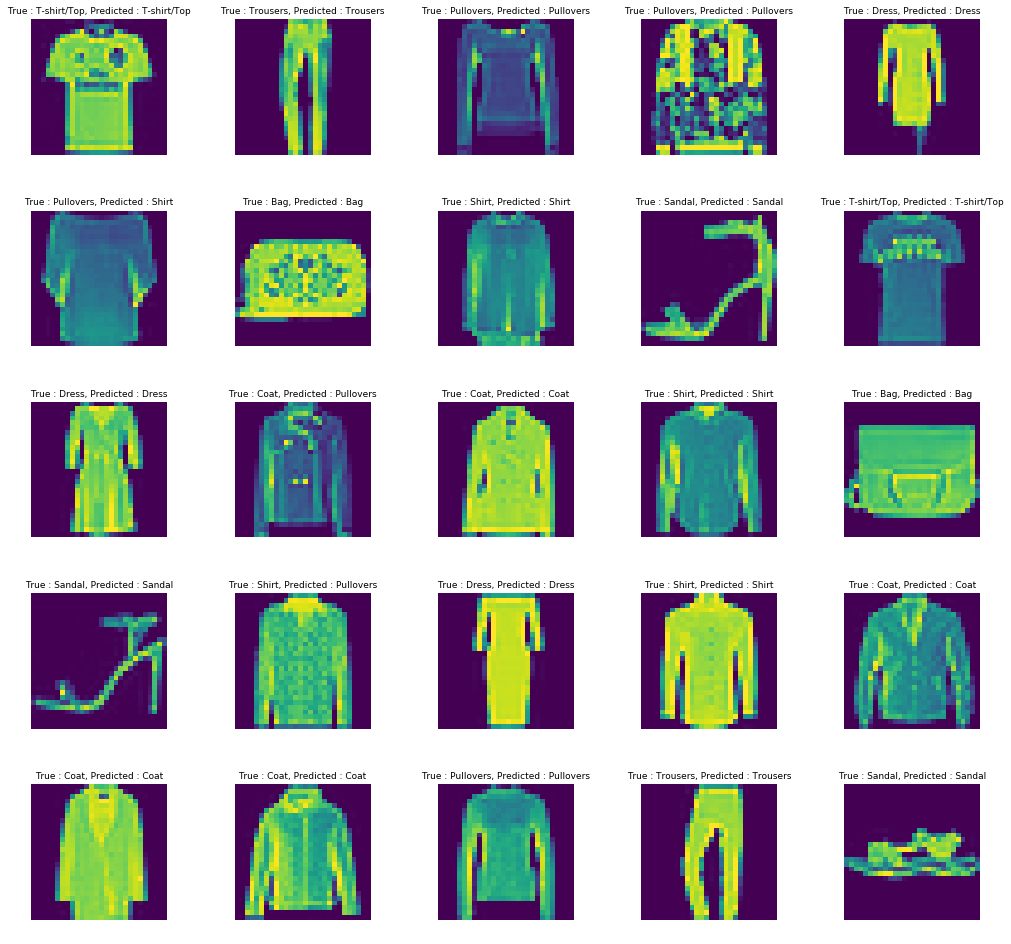

In [95]:
W = 5
L = 5

fig, axes = plt.subplots(W,L, figsize=(17,17))

axes = axes.ravel()

for i in np.arange(0, W*L):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f'True : {labels[y_test[i]]}, Predicted : {labels[predicted_classes[i]]}', fontsize = 9)
    axes[i].axis('off')
    
plt.subplots_adjust(wspace= 0.5)    

## Now creating a confusion matrix and implementing it in our seaborn heatmap to check out our true predictions

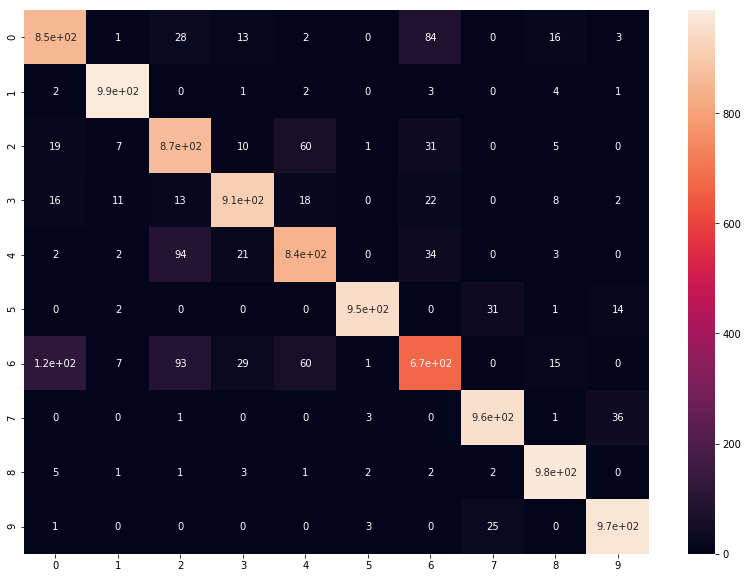

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm , annot = True)

## Now we'll create a classification report to check which class was identified more accrately then other classes

In [102]:
from sklearn.metrics import classification_report
target_names = [f"{labels[predicted_classes[i]]}" for i in range(0, len(labels.keys()))]
print(classification_report(y_test, predicted_classes, target_names= target_names))

              precision    recall  f1-score   support

 T-shirt/Top       0.84      0.85      0.84      1000
    Trousers       0.97      0.99      0.98      1000
   Pullovers       0.79      0.87      0.83      1000
   Pullovers       0.92      0.91      0.92      1000
       Dress       0.86      0.84      0.85      1000
       Shirt       0.99      0.95      0.97      1000
         Bag       0.79      0.67      0.73      1000
       Shirt       0.94      0.96      0.95      1000
      Sandal       0.95      0.98      0.97      1000
 T-shirt/Top       0.95      0.97      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## The average of our model turned out to be 90% so, I guess that's pretty good.